## Machine Learning Specialization : Supervised Machine Learning 
### Introduction to Machine Learning

Andrew Ng

---


### What is Machine Learning ?

Fiel of study that gives computers the ability to learn without being explicitly programmed.

### Machine Learning Algorithms

- Supervised Learning : 
    - It used most in real-world applications
    - Rapid Advancements
- Unsupervised Learning
- Recommender systems
- Reinforment Learning

Practical advice for applying learning algorithms.



---

### **Supervised Learning**



Supervised learning is a type of machine learning where the model is trained on labeled data, meaning each input is paired with the correct output. The goal is to learn a mapping from inputs (X) to outputs (Y), so that the model can accurately predict the output for new, unseen inputs. 

#####  Regression

In regression, the learning algorithm predicts continuous numerical values instead of discrete categories. For example, in a housing price prediction task, the model must estimate a specific price from infinitely many possible values.


##### Classification / Class Category

It is a type of predictive modeling where the goal is to assign data into predefined categories or classes. For example, a model can classify an image as either a cat or a dog, or determine whether a medical condition is benign or malignant.




---

### **Unsupervised Learning**

Unsupervised learning find something interesting in unlabeled data.
Data only comes with inputs x , but not output labels y. Algorithm has to find structure in the data.

##### Cluster Algorithm 

A clustering algorithm is an unsupervised learning method used to group data points into clusters, where points in the same cluster are more similar to each other than to those in other clusters. For example, it can organize customers into groups based on purchasing behavior or segment images by visual similarity. Group Similar data points together.

##### Anomaly detection

Find unusual data points.

Anomaly detection is the process of identifying data points, events, or patterns that deviate significantly from the norm. These unusual instances may indicate critical information, such as fraud in financial transactions, defects in manufacturing, or abnormal patterns in medical data.

##### Dimensionality reduction
Compress data using fewer numbers.

Dimensionality reduction is the process of simplifying data by reducing the number of input variables while preserving as much relevant information as possible. For example, techniques like PCA (Principal Component Analysis) can compress high-dimensional data into fewer dimensions, making it easier to visualize and analyze without losing essential patterns.

---

### **Supervised Learning vs Unsupervised Learning**

| Característica | Supervised Learning | Unsupervised Learning |
|---------------|--------------------|-----------------------|
| Datos de entrada | Datos etiquetados (X, Y) | Datos no etiquetados (solo X) |
| Etiquetas (Y) | Sí, conocidas | No existen |
| Objetivo | Aprender la relación X → Y | Descubrir estructura o patrones |
| Tipo de salida | Predicción | Grupos, anomalías o componentes |
| Tipos principales | Regresión, Clasificación | Clustering, Anomaly Detection, Dimensionality Reduction |
| Ejemplo típico | Predicción de precios | Segmentación de clientes |
| Evaluación | Métricas claras (MSE, Accuracy, F1) | Más subjetiva (Silhouette, visualización) |
| Complejidad conceptual | Más directa | Más exploratoria |
| Casos de uso | Predicción y toma de decisiones | Exploración y entendimiento del dato |


---

## **Linear Regression - Model Part 1 & 2**

### **Linear Regression with One Variable**

### Part 1

#### Terminology 

| Size (ft²) | Price ($1000s) |
|-----------|---------------|
| 2104 | 400 |
| 1416 | 232 |
| 1534 | 315 |
| 852  | 178 |
| ...  | ... |
| 3210 | 870 |


- Training Set 
    - Data used to train the model

- Notation 
    - x = "input" variable / feature
    - y = "output" variable / "target" variable
    - m = number of training examples 
    - $(x , y)$ = single training example
    - $(x^{(i)},y^{(i)})$ = $i^{th}$ training example / index

    Where:
    - x = 2104  
    - y = 400
    - $(x , y)$ = (2104, 400)
    - $i = (1^{st} , 2^{st} , 3^{st} ... n^{st})$



### Part 2

We have a training set that contains input features and target values.To train the model, we need to feed the learning algorithm with both the input features (X) and the output targets (Y). A supervised learning algorithm uses this training data to learn a function. This function is called a hypothesis, but in practice, we usually refer to it simply as a function, denoted by f. The goal of the function f is to take a new input x and produce an estimated output, called $\hat{y}$. 

- In machine learning, the convention is that $\hat{y}$ represents the prediction or estimate of the true value y.
- The function f is called the model.
- $\hat{y}$ is the model’s prediction
- The prediction $\hat{y}$ is an estimate of y


#### **Conceptual Flow**

x → $f$ → $\hat{y}$

feature → model → prediction (estimated y)

#### **Example (Regression)**

size → $f$ → price (estimated)

#### **How to represent f ?** 

One way to represent the model $f$ is using a linear function

$f_{w,b}(x) = wx + b$

Or simply : 

$f(x) = wx + b$

This is a linear model , and it is called linear regression with one variable (also known as univariate linear regression).

### Notation Summary 


| General Notation | Description | Python (if applicable) |
|---|---|---|
| $a$ | scalar, non bold | |
| $\mathbf{a}$ | vector, bold | |
| **Regression** | | |
| $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft)) | `x_train` |
| $\mathbf{y}$ | Training Example targets (in this lab Price (1000s of dollars)) | `y_train` |
| $x^{(i)}$, $y^{(i)}$ | $i_{th}$ Training Example | `x_i`, `y_i` |
| $m$ | Number of training examples | `m` |
| $w$ | parameter: weight | `w` |
| $b$ | parameter: bias | `b` |
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$ | `f_wb` |


---

## **Cost Function**

In supervised learning, the cost function measures how well the hypothesis fits the training data.Measure how wrong a model is over the entire dataset.

### Core idea

- Model makes predictions 
$\hat{y}$	​


- Real values are 
$y$	​

- Each prediction has an error

- The cost function aggregates all errors into one scalar

The cost function measures how far the hypothesis is from the training data and provides the objective that learning algorithms minimize.

---

## **Libraries**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

---

### Example 

You would like a model which can predict housing prices given the size of the house.
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.

In [27]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

### Computing Cost Function

In [28]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

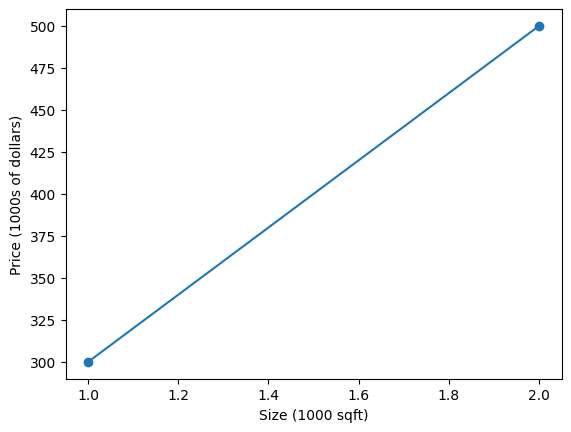

The cost is: $12500.0


In [29]:
plt.plot(x_train, y_train, marker="o")
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price (1000s of dollars)")
plt.show()

print(f"The cost is: ${compute_cost(x_train, y_train, 100, 100)}")

---

## **Gradient descent**

Gradient descent minimizes the cost function by iteratively updating parameters in the direction of the negative gradient.

### Core idea

- Start with some parameters and repeatedly adjust them to reduce the cost function until reaching a minimum.

### Intuition

- The cost function defines a surface

- The gradient gives the direction of steepest increase

- Move in the opposite direction to decrease the cost

- Repeat until convergence

### Example 

Let's use the same two data points as before - a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.

In [41]:
# Load our data set
x_train = np.array([1.0, 2.0, 3.0])   #features
y_train = np.array([300.0, 500.0, 700.0])   #target values

### Computing Cost Function

In [42]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

### Computing gradient

In [43]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

### Gradient descent

In [44]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

### Initialize parameters 

In [45]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.23e+05  dj_dw: -1.133e+03, dj_db: -5.000e+02   w:  1.133e+01, b: 5.00000e+00
Iteration 1000: Cost 6.55e-01  dj_dw:  1.600e-01, dj_db: -3.636e-01   w:  2.013e+02, b: 9.69785e+01
Iteration 2000: Cost 5.91e-02  dj_dw:  4.805e-02, dj_db: -1.092e-01   w:  2.004e+02, b: 9.90924e+01
Iteration 3000: Cost 5.33e-03  dj_dw:  1.443e-02, dj_db: -3.281e-02   w:  2.001e+02, b: 9.97274e+01
Iteration 4000: Cost 4.81e-04  dj_dw:  4.335e-03, dj_db: -9.855e-03   w:  2.000e+02, b: 9.99181e+01
Iteration 5000: Cost 4.34e-05  dj_dw:  1.302e-03, dj_db: -2.960e-03   w:  2.000e+02, b: 9.99754e+01
Iteration 6000: Cost 3.92e-06  dj_dw:  3.912e-04, dj_db: -8.893e-04   w:  2.000e+02, b: 9.99926e+01
Iteration 7000: Cost 3.53e-07  dj_dw:  1.175e-04, dj_db: -2.671e-04   w:  2.000e+02, b: 9.99978e+01
Iteration 8000: Cost 3.19e-08  dj_dw:  3.530e-05, dj_db: -8.024e-05   w:  2.000e+02, b: 9.99993e+01
Iteration 9000: Cost 2.88e-09  dj_dw:  1.060e-05, dj_db: -2.410e-05   w:  2.000e+02, b: 9.99998e+01


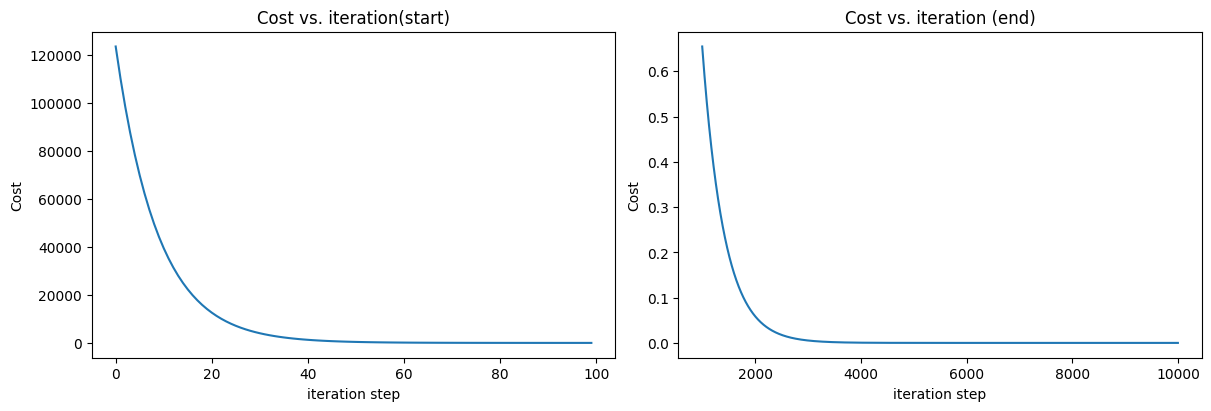

In [46]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [48]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")
print(f"2500 sqft house prediction {w_final*2.5 + b_final:0.1f} Thousand dollars")


1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
2500 sqft house prediction 600.0 Thousand dollars
